In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_users = pd.read_csv('./29CM_PJT_data/sampled_users.csv')
df_events = pd.read_csv('29CM_PJT_data/sampled_events.csv')
df_products = pd.read_csv('./29CM_PJT_data/sampled_products.csv')

### df events's null
mobile_brand_name has null 3594 <br>
mobile_model_name has null 3594 <br>
mobile_marketing_name has null 4250941 <br>
country has null 12 <br>
region has null 2195 <br>


티를 5장 샀는데 Log의 low 5개가 찍혔어. 어떻게 찍혔을까 -> timestamp가 동일하게 찍힐까? <br>

데이터 테이블은 PK가 필수가 아니에요 <br>

PK 없는 데이터 테이블이에요. <br>
FK 두 개.

그 다음 안건 
티 5장 샀을때 두 가지 방법으로 Log 
5개의 로우

1000 티

세션 1 네임 1 price * 5 

- 전환율이 낮은 카테고리에 대해 분석하고 입점할 수 있는 브랜드를 제안해보자
- 고객 가치 향상을 위한 유저 행동 분석
- 29CM 브랜드 분석을 통한 신규 브랜드 사 입점 가이드 제안
- 29cm의 미션, 'Guide to Better choice"에 적합한 KPI 제안을 위한 데이터 분석

In [3]:
# 재구매율 -> 옷 한 상품에 대한 재구매율보다는
# 여러 사이트중에서 29 cm 다시 선택이유

In [4]:
df_products

,item_no,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name
0,++/211gtgspgB1TaPWEUQw==,베스트 코트\n( Vest Coat )_lavender,6842e3f320ef4459fac54dcea70c8245,1150000.0,243100100,의류,243101100,아우터,243101103,코트,4308.0,FOCEPS
1,++4eWFkX4oCtVYiKi34/Dw==,21SS 넥 페이스 패치 기모 맨투맨 블랙 CI0062 AHJ,1bdc06804580fddfbe46d4e2af140f08,466830.0,243100100,의류,243102100,상의,243102103,티셔츠,9302.0,Acne Studios_바이스트
2,++BoE+rYvLTJEAXMQFQLpQ==,[서울웰컴티 선물 세트] 일상 옥수수차,cb4a9bb103f9bd84d5d126ad4acec74b,15000.0,249100100,식품,249105100,음료,249105105,차류,4775.0,Urbanbookshop
3,++RIzj1vpFLWgoX7LgCfLQ==,PLAIN SQUARE BAG S (IV),4c3f75e886c8114d7d00d19a4f0c34d5,118000.0,244100100,잡화,244102100,가방,244102104,토트백,2546.0,zisoo
4,++W7/YMlPMwbAfyyJZEuIw==,클리어 바디미스트 150ml,5f136d4e25c837c3b658de16ac2156d9,27000.0,247100100,화장품/미용,247109100,바디케어,247109104,바디미스트,12986.0,밀크바오밥
...,...,...,...,...,...,...,...,...,...,...,...,...
283321,zznjWkK64Fsflp1BbqeXQA==,SUMMER WOOL DOLMAN SLEEVE KNIT CARDIGAN,6e4bac52c12f2b2b923404c926fe404f,145000.0,243100100,의류,243102100,상의,243102102,카디건,14321.0,Carriere
283322,zzq8OW9uW0wofJhaKzp/Fg==,Silket Cotton Jersey T-Shirt Grey,569af51a0a61f7156b34b5cf251b82f0,98000.0,243100100,의류,243102100,상의,243102103,티셔츠,2085.0,aheit
283323,zzxE9xkXnKM0B4Y+hev34w==,[본사직영] 골라클래식 남성 COASTER HIGH (WHITE) GC_MA205_WW,3ca49f5d240325423bdc90942e2d61c5,75000.0,244100100,잡화,244101100,신발,244101115,스니커즈,4440.0,GOLA
283324,zzzTNW8escss3zrnpuGMhQ==,21SS 마몬트 퀄팅 숄더/크로스백 448065 DTD1T 1000,00acf5906a360209ea248ae8933a2408,1743300.0,244100100,잡화,244102100,가방,244102103,크로스백,9410.0,GUCCI_바이스트


In [5]:
df_users

,user_no,birth_date,gender
0,++MXKfwkOw4VFn9HkVCRrw==,1994-08-25,F
1,++QhQ1e1epIwx3vRl2Jo3g==,1994-08-20,F
2,++gfxvExR4bVIl3/hWsX7Q==,1990-11-14,F
3,++hK92KjjWxhaH5fVgRFww==,1997-03-30,F
4,++izmuIS/QEffdUxvt0y4Q==,1992-09-07,F
...,...,...,...
254953,zzJh2DNSlyzZYCx1T7Yprw==,1984-02-01,F
254954,zzQb08qbNg8VZ+c3wMVhuw==,1972-12-15,F
254955,zzblhcY6j0rWP7m/5w6kqg==,2002-02-26,F
254956,zzzTNW8escss3zrnpuGMhQ==,1991-10-27,M


In [6]:
df = pd.merge(df_events, df_users, how='inner', on = 'user_no')

In [7]:
df[df.birth_date.isnull()]

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,birth_date,gender
4219,6ea8bb7421220be77a273255c4b489c2,2021-06-03 13:00:48.808,like_item,s+QCCrwiN36OfluPaKsqzw==,+X82Bkul3BplVDUnX+WaYg==,mobile,Xiaomi,Redmi Note 7,NaN,Android 10,South Korea,Chungcheongbuk-do,ANDROID,NaN,NaN
4220,6ea8bb7421220be77a273255c4b489c2,2021-06-03 13:01:07.605,like_item,s+QCCrwiN36OfluPaKsqzw==,oFRXXqTkVnEBJuYzlZzLtQ==,mobile,Xiaomi,Redmi Note 7,NaN,Android 10,South Korea,Chungcheongbuk-do,ANDROID,NaN,NaN
4221,6ea8bb7421220be77a273255c4b489c2,2021-06-03 13:01:43.045,like_item,s+QCCrwiN36OfluPaKsqzw==,zXRgNScG1dBqAjJPlpqPhw==,mobile,Xiaomi,Redmi Note 7,NaN,Android 10,South Korea,Chungcheongbuk-do,ANDROID,NaN,NaN
4222,6ea8bb7421220be77a273255c4b489c2,2021-06-03 13:02:08.381,like_item,s+QCCrwiN36OfluPaKsqzw==,QRY6WwQjWlgMOQdsXs5s8Q==,mobile,Xiaomi,Redmi Note 7,NaN,Android 10,South Korea,Chungcheongbuk-do,ANDROID,NaN,NaN
4223,6ea8bb7421220be77a273255c4b489c2,2021-06-03 13:02:12.625002,like_item,s+QCCrwiN36OfluPaKsqzw==,gXgFwJBeGoeGayPBETagpw==,mobile,Xiaomi,Redmi Note 7,NaN,Android 10,South Korea,Chungcheongbuk-do,ANDROID,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880365,2100415c83a75015c2871380a11d68ea,2021-08-04 12:55:38.518389,click_item,e9gsRKeMUCVPV9r6wGDpAQ==,gbHR4UJxKo9iJ1dAGgVW2g==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Gangwon-do,IOS,NaN,NaN
5880389,8fa7e001b0726a30e799732f7a1455ce,2021-08-04 12:45:18.233026,click_item,U2tJSblGok/L07FXpieMZg==,khhvcMemv0I6X55M/FGCwQ==,mobile,Apple,iPhone,NaN,iOS 14.7,South Korea,Seoul,IOS,NaN,NaN
5880399,cca300cbbd5d0c1e80aede995c9eab69,2021-08-04 12:53:34.684042,click_item,6h/NOtV+88A7Cddek6xeVA==,zcrGyr5mrVB7tgo030A1KQ==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Daejeon,IOS,NaN,NaN
5880401,4348b62152f744dbb4b9e401892451de,2021-08-04 12:58:36.366004,purchase_success,AL2Sst8MhZsOlxg5TibxsA==,D0VWjbDA0Hn/u4LJSwVyDw==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Seoul,IOS,NaN,NaN


In [8]:
df_events # log data 
for cols in df_events.columns:
    if df_events[cols].is_unique:
        print(cols)

In [9]:
for col in df_products.columns:
    if df_products[col].is_unique:
        print(col)

item_no
image_name


In [10]:
for col in df_users.columns:
    if df_users[col].is_unique:
        print(col)

user_no


In [11]:
f, ax = plt.subplots(nrows=1, ncols=1)

sns.heatmap(df_events.T.isna(), cmap='Blues')
ax.set_title('events Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

/var/folders/3d/fksyvw8102q5p7zbsjrk_qs80000gn/T/ipykernel_9708/2748212504.py:7: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)


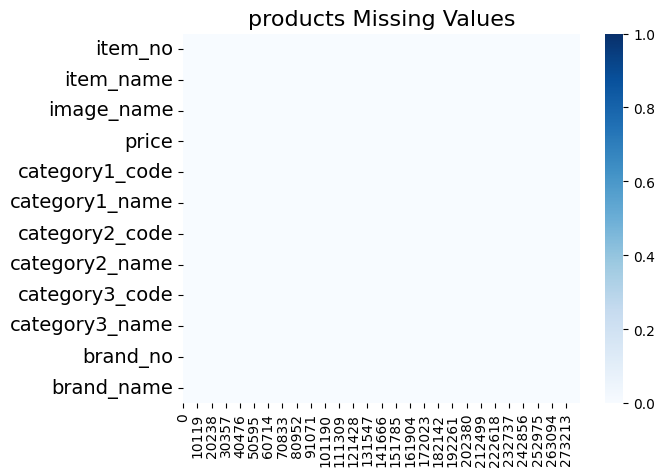

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1)

sns.heatmap(df_products.T.isna(), cmap='Blues')
ax.set_title('products Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

/var/folders/3d/fksyvw8102q5p7zbsjrk_qs80000gn/T/ipykernel_9708/3753195454.py:7: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)


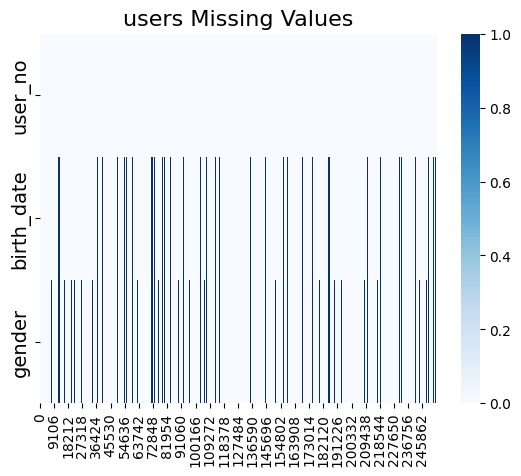

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1)

sns.heatmap(df_users.T.isna(), cmap='Blues')
ax.set_title('users Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

코호트 분석

접속한 모바일 기기가 바뀐 유저 탐색 <br>
action plan : 해당 기기에 맞춘 액세서리 추천 가능

In [ ]:
def get_change_mobile_user(df:pd.DataFrame)->list:
    '''
    이용자의 접속기록에서 접속한 모바일기기의 변화를 찾습니다.
    함수의 반환은 사용자와 timestamp의 tuple을 원소로 가지는 list입니다.
    '''
    df_mobile = df[['user_no', 'mobile_brand_name','event_timestamp']].copy()
    change_mobile = []
    cnt = 0

    for idx, user_name in enumerate(df_users.user_no):
        if len(df_mobile[df_mobile.user_no == user_name].mobile_brand_name.unique()) > 1:
            cnt += 1
            change_mobile.append((user_name, df_mobile[df_mobile.user_no == user_name].event_timestamp))
            
        print(f'\r{idx}/{len(df_users)} | 추가된 인원 : {cnt}',end="") # 프로세스 진행
    return change_mobile

change_mobile = get_change_mobile_user(df_events)

사용자 획득일 추가 <br>
*사용자 획득일:사용자 세션을 처음 시작한 날

In [ ]:
def get_users_first_session(df:pd.DataFrame)->pd.DataFrame:
    '''
    유저가 기록단위에서 세션에 처음 등장한 event log를 찾습니다 : 사용자 획득 |
    반환은 pandas Data Frame 객체입니다.
    '''
    df_user_first_session = pd.DataFrame(data=[])
    for idx, user_name in enumerate(df_users.user_no):
        df_user_first_session = pd.concat([df_user_first_session, df[df.user_no == user_name].iloc[0]],axis = 0)
        print(f'\r {idx}/{len(df_users)} : {user_name}', end="") # 프로세스 확인
    return df_user_first_session

df_users_first_session = get_users_first_session(df_events)

,user_no,event_timestamp
0,+9eODQMZ8YgXQZJJAo56nw==,2021-06-03 13:00:01.845
1,qik2Oa/1SQAjHeR64GLY0g==,2021-06-03 13:00:01.920001
2,FJJ6W70VNARaqflivNavLg==,2021-06-03 13:00:02.35
3,MsFi+mS5EhwSv+ZqTtZ53w==,2021-06-03 13:00:02.994
4,frWHEf/czsCEjklEIwxxKA==,2021-06-03 13:00:03.312001
...,...,...
5880377,ROKDMwVDKbb9N82CptJ9dg==,2021-08-04 12:59:38.148042
5880379,fyw6HGR8kuWR9Ehe4u3D5g==,2021-08-04 12:59:39.399035
5880385,yj5w2XAGruSLd8jvjm2bXw==,2021-08-04 12:59:42.900025
5880393,Z2TnpP6LHVBBxJYvnOwjRw==,2021-08-04 12:59:49.186004


In [ ]:
df_user = pd.DataFrame(data=[])
for idx, user_name in enumerate(df_users.user_no):
    df_user = pd.concat([df_user, df_events[df_events.user_no == user_name].iloc[0]],axis = 0)
    print(f'\r {idx}/{len(df_users)} : {user_name}', end="")
df_user

 121번째 유저 : +BfXTcd4pf2QFrts6XFTXg==

KeyboardInterrupt: 

In [ ]:
df_events.iloc[0]

session_id                  c47e93742387750baba2e238558fa12d
event_timestamp                      2021-06-03 13:00:01.845
event_name                                        click_item
user_no                             +9eODQMZ8YgXQZJJAo56nw==
item_no                             4KwsZkXDulM0oQ2sTVSlYQ==
device_type                                           mobile
mobile_brand_name                                    Samsung
mobile_model_name                                   SM-N960N
mobile_marketing_name                           Galaxy Note9
operating_system_version                          Android 10
country                                          South Korea
region                                           Gyeonggi-do
platform                                             ANDROID
Name: 0, dtype: object